In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRS0z-BpUNElIthEL3DrT5XPoNLO3kaZIHn7yj-trP1nHXPeeDCPvxvGtRl2OEvbgTmgKT5iuZ6u-LZ/pub?output=csv")

In [3]:
df

,Academic Year,Placement,PG,Entrepreneurship,Internship,Total Count,Class Strength,Percentage
0,2015-16,24,39,1,4,0,88,0.000000
1,2016-17,48,7,7,19,62,75,82.666667
2,2017-18,38,0,4,63,42,51,82.352941
3,2018-19,61,5,1,57,67,82,81.707317
4,2019-20,49,4,1,124,54,62,87.096774
5,2020-21,48,0,6,136,54,77,70.129870
6,2021-22,38,0,0,0,38,83,45.783133


In [4]:
placement_df=df[["Academic Year","Placement","Class Strength"]]

In [5]:
placement_df

,Academic Year,Placement,Class Strength
0,2015-16,24,88
1,2016-17,48,75
2,2017-18,38,51
3,2018-19,61,82
4,2019-20,49,62
5,2020-21,48,77
6,2021-22,38,83


In [6]:
placement_df.describe()

,Placement,Class Strength
count,7.000000,7.000000
mean,43.714286,74.000000
std,11.672108,13.063945
min,24.000000,51.000000
25%,38.000000,68.500000
50%,48.000000,77.000000
75%,48.500000,82.500000
max,61.000000,88.000000


In [7]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Academic Year   7 non-null      object
 1   Placement       7 non-null      int64 
 2   Class Strength  7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 296.0+ bytes


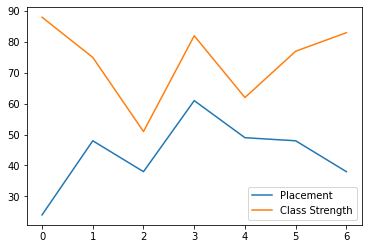

In [8]:
placement_df.plot()
plt.show()

In [9]:
def dash(value):
    value = str(value)
    if '-' in value:
        value = value.split('-')[0]
        return int(value)
    else:
        return int(value)

In [10]:
placement_df["Academic Year"]=placement_df["Academic Year"].apply(dash)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
placement_df

,Academic Year,Placement,Class Strength
0,2015,24,88
1,2016,48,75
2,2017,38,51
3,2018,61,82
4,2019,49,62
5,2020,48,77
6,2021,38,83


In [12]:
df=placement_df

In [15]:
df

,Academic Year,Placement,Class Strength
0,2015,24,88
1,2016,48,75
2,2017,38,51
3,2018,61,82
4,2019,49,62
5,2020,48,77
6,2021,38,83


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

In [17]:
x_train=df[["Academic Year","Class Strength"]]

In [18]:
y_train=df["Placement"]

In [19]:
x_train

,Academic Year,Class Strength
0,2015,88
1,2016,75
2,2017,51
3,2018,82
4,2019,62
5,2020,77
6,2021,83


In [20]:
y_train

0    24
1    48
2    38
3    61
4    49
5    48
6    38
Name: Placement, dtype: int64

In [21]:
#create, train and do inference of the model
model = RandomForestRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_train)

#calculate MAE
mae = np.round(mean_absolute_error(y_train, predictions), 3) 

In [22]:
mae

3.671

In [23]:
import pickle
import os

with open('Placement.pkl', 'wb') as fileWriteStream:
    pickle.dump(model, fileWriteStream)
    fileWriteStream.close()

In [24]:
model

RandomForestRegressor()

In [25]:
model.predict([[2021,80]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([51.23])